# 1. 데이터 및 라이브러리 입력

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train_df = pd.read_csv("./titanic/train.csv")
test_df = pd.read_csv("./titanic/test.csv")
submisson = pd.read_csv("./titanic/gender_submission.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
submisson.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
import random
np.random.seed(1234)
random.seed(1234)

# 2. 데이터 둘러보기

## 2.1.1 질적데이터의 분리
#### - 항구, 성별 (명목형)
#### - 티켓 등급 (순서형)

In [8]:
#모양확인
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [9]:
### 보여지는 데이터프레임의 행과열을 50으로 설정
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",50)

train_df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### column의 의미
##### Survived 생존여부
##### Pclass 티켓의 등급
##### Sex 성별
##### Age 나이
##### SibSp 동승중인 형제나 배우자의 수
##### Parch 동승중인 부모, 자녀의 수
##### Ticket 티켓번호
##### Fare 티켓요금
##### Cabin 방번호
##### Embarked 승선한 항구의 이름

In [17]:
# 데이터 속성확인
train_df.dtypes
#int64 -> 정수형
#float64 -> 실수형
#object -> 문자열

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
#데이터의 통계치 확인
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 모두 어느정도 차이는 있는나 크게 유의미하지는 않음

In [20]:
# 카테고리변수 확인

#남여 비율 확인
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
#승선항구별 분포 확인
train_df["Embarked"].value_counts()
# S - Southampton
# C - Cherbourg
# Q - Queenstown

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
#한방에 대충 몇명씩 있는지 확인
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

### 지금까지의 정보
### 1. 남자가 여자의 두배정도 탔다
### 2. 대부분 Southampton에서 배를 탔다
### 3. 방에는 1명에서 최대 4명이 입실했다.

In [23]:
# 결측치 확인하기

train_df.isnull().sum(), test_df.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

##### => 방에대한 정보와 나이에 대한 정보에 결측치가 많다

## 2.2 질적데이터 시각화

In [24]:
#표시스타일 정의

plt.style.use("ggplot")

In [25]:
# 1. 생존관련 시각화
# 항구와 생존의 관계를 시각화 해보자

#항구, 생존여부, id만 추출후 결측치 제거
train_df[["Embarked","Survived","PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [26]:
#그룹화하여 집계
train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [27]:
train_df[["PassengerId","Survived","Sex"]].dropna().groupby(["Sex","Survived"]).count()

PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109

In [28]:
# 위의 표를 수평 정렬
train_df[["PassengerId","Survived","Sex"]].dropna().groupby(["Sex","Survived"]).count().unstack()

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

In [29]:
#혼자해보는 실습
train_df[["Sex","Pclass","Survived","PassengerId"]]

,Sex,Pclass,Survived,PassengerId
0,male,3,0,1
1,female,1,1,2
2,female,3,1,3
3,female,1,1,4
4,male,3,0,5
...,...,...,...,...
886,male,2,0,887
887,female,1,1,888
888,female,3,0,889
889,male,1,1,890


In [30]:
train_df[["Sex","Pclass","Survived","PassengerId"]].dropna()

,Sex,Pclass,Survived,PassengerId
0,male,3,0,1
1,female,1,1,2
2,female,3,1,3
3,female,1,1,4
4,male,3,0,5
...,...,...,...,...
886,male,2,0,887
887,female,1,1,888
888,female,3,0,889
889,male,1,1,890


In [31]:
train_df[["Sex","Pclass","Survived","PassengerId"]].dropna().groupby(["Sex","Pclass","Survived"]).count().unstack()

PassengerId    
Survived                0   1
Sex    Pclass                
female 1                3  91
       2                6  70
       3               72  72
male   1               77  45
       2               91  17
       3              300  47

array([<AxesSubplot:ylabel='(PassengerId, female)'>,
       <AxesSubplot:ylabel='(PassengerId, male)'>], dtype=object)

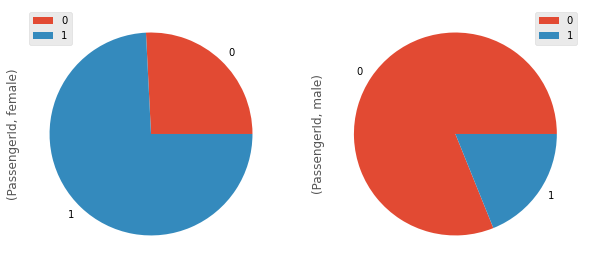

In [32]:

train_df[["Sex","Survived","PassengerId"]].groupby(["Survived","Sex"]).count().unstack().plot.pie(subplots=True,figsize=(10,10))


In [33]:
# 누적 막대그래프로 시각화

#새로운 데이터프레임 생성
embarked_df = train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count().unstack()
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<AxesSubplot:xlabel='Embarked'>

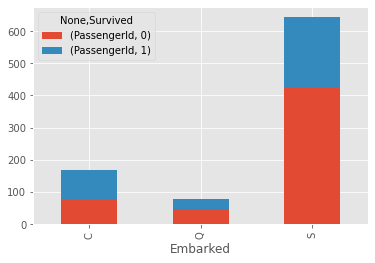

In [34]:
embarked_df.plot.bar(stacked=True)

### Cherboug에서는 절반정도,
### Queenstown, Southampton에서는 절반이상이 사망했다
### 과연 유의미한 정보일까?

In [35]:
# 수치로 이를 확인

#새로운 cloumn 생성
embarked_df["survived_rate"] = embarked_df.iloc[:,0] / (embarked_df.iloc[:,0]+embarked_df.iloc[:,1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

### 정확한 수치로 확인해보니 그렇게 큰 의미는 없어 보인다.
### 
### 나머지 성별, 티켓의 등급도 시각화화여 확인해보자

<AxesSubplot:xlabel='Sex'>

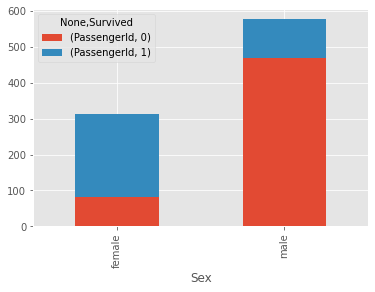

In [36]:
sex_df = train_df[["Sex","Survived","PassengerId"]].dropna().groupby(["Sex","Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)

### 여자의 생존률이 남자보다 훨씬 높다

<AxesSubplot:xlabel='Pclass'>

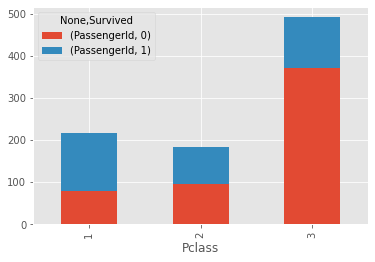

In [228]:
ticket_df = train_df[["Pclass","Survived","PassengerId"]].dropna().groupby(["Pclass","Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

### 티켓의 등급이 높을수록 생존율역시 올라감을 알 수 있다.
### 
### 여자와 높은 등급의 승객이 더 먼저 구조되었음을 유추할 수 있다.